# Assignment 3

In [1]:
import numpy as np
import pandas as pd

# Problem 1. KNN and Spam

## Background

The dataset consists of a collection of 57 features relating to about 4600 emails and a label of whether or not the email is considered spam. You have a training set containing about 70% of the data and a test set containing about 30% of the data. Your job is to build effective spam classification rules using the predictors.

## A note about features

The column names (in the first row of each .csv file) are fairly self-explanatory.

Some variables are named `word_freq_(word)`, which suggests a calculation of the frequency of how many times a specific word appears in the email, expressed as a percentage of total words in the email multiplied by $100$.

Some variables are named `char_freq_(*)`, which suggests a count of the frequency of the specific ensuing character, expressed as a percentage of total characters in the email multiplied by $100$.

Some variables are named `capital_run_length_(*)` which suggests some information about the average (or maximum length of, or total) consecutive capital letters in the email.

`spam`: This is the response variable, 0 = not spam, 1 = spam.

In [2]:
dftr = pd.read_csv('spam_train_withlabels.csv',header=0)
dfte = pd.read_csv('spam_test_nolabels.csv',header=0)

In [3]:
dfte.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.0,0.0,0.00,0.0,0.9,0.0,0.00,0.0,0.0,0.0,...,0.0,0.000,0.449,0.0,0.000,0.0,0.0,2.150,11,43
1,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,1.204,0.000,0.0,0.000,0.0,0.0,1.285,2,9
2,0.0,0.0,0.55,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.000,0.087,0.0,0.000,0.0,0.0,NaN,47,94
3,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.000,0.345,0.0,0.000,0.0,0.0,1.666,6,55
4,0.0,0.0,0.00,0.0,0.0,0.0,0.59,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.427,0.0,0.0,10.000,33,170


In [4]:
dftr.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.1,0.00,0.0,0.10,0.21,0.00,0.10,0.0,0.00,...,0.000,0.047,0.000,0.000,0.031,0.0,1.793,12,391,0
1,0.00,0.0,0.29,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000,0.178,0.000,0.044,0.000,0.0,-500.000,10,180,0
2,0.47,0.0,0.95,0.0,0.95,0.00,0.95,0.00,0.0,0.00,...,0.000,0.076,0.000,1.306,0.230,0.0,6.027,91,217,1
3,0.00,0.0,0.37,0.0,1.11,0.74,0.00,2.96,0.0,2.96,...,0.000,0.149,0.000,1.096,0.000,0.0,5.160,107,289,1
4,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.634,0.000,0.211,0.000,0.211,0.0,1.347,4,31,0


In [6]:
merged_train_test = pd.concat([dftr.drop('spam',axis=1),dfte])

In [7]:
merged_train_test.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.1,0.00,0.0,0.10,0.21,0.00,0.10,0.0,0.00,...,0.0,0.000,0.047,0.000,0.000,0.031,0.0,1.793,12,391
1,0.00,0.0,0.29,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.178,0.000,0.044,0.000,0.0,-500.000,10,180
2,0.47,0.0,0.95,0.0,0.95,0.00,0.95,0.00,0.0,0.00,...,0.0,0.000,0.076,0.000,1.306,0.230,0.0,6.027,91,217
3,0.00,0.0,0.37,0.0,1.11,0.74,0.00,2.96,0.0,2.96,...,0.0,0.000,0.149,0.000,1.096,0.000,0.0,5.160,107,289
4,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.634,0.000,0.211,0.000,0.211,0.0,1.347,4,31


How many repeat indices are there in the merged dataset?

In [8]:
np.sum(np.unique(merged_train_test.index,return_counts=True)[1]>1)

880

## Missing Values and outliers

You can view missing values with the following code. Recall that an NA or `np.nan` represent missing values. **DO NOT DELETE THEM**

In [9]:
merged_train_test.isna().sum().sort_values(ascending=False)

capital_run_length_average    404
capital_run_length_total        0
word_freq_report                0
word_freq_hpl                   0
word_freq_hp                    0
word_freq_money                 0
word_freq_000                   0
word_freq_font                  0
word_freq_your                  0
word_freq_credit                0
word_freq_you                   0
word_freq_email                 0
word_freq_business              0
word_freq_free                  0
word_freq_addresses             0
word_freq_people                0
word_freq_650                   0
word_freq_will                  0
word_freq_receive               0
word_freq_mail                  0
word_freq_order                 0
word_freq_internet              0
word_freq_remove                0
word_freq_over                  0
word_freq_our                   0
word_freq_3d                    0
word_freq_all                   0
word_freq_address               0
word_freq_george                0
word_freq_lab 

### Task 0
Output the total number of outlier values that you have clearly found. Explain your reasoning. **DO NOT DELETE THEM**

In [10]:
##Histogram plots
import matplotlib.pyplot as plt
# Check statistics of each feature, and then plot the histogram of that feature, to see the number of outlier
merged_train_test.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4197.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,-51.072045,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,162.831083,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-500.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.076000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.401000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


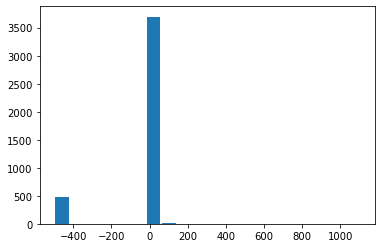

In [11]:
# We could see that in the column 'capital_run_length_average' there exists losts of negative values, which can be outliers.
# So, we plot the histogram as follows
plt.hist(merged_train_test['capital_run_length_average'], bins=20, rwidth=0.9)
plt.show()

In [12]:
# learn from the histogram, we define the negative data in column 'capital_run_length_average' as outliers. 
# And count the numbers
n_outlier = merged_train_test[merged_train_test['capital_run_length_average'] < 0].shape[0]
print(n_outlier)

470


### Task 1

Split off the `spam` column **from the training dataframe** into a new vector called `ytrain` and drop the column from the training dataframe. Use $k$-nearest neighbors regression **trained on the training dataset** with $k = 15$ to impute the missing/outlier values in the `capital_run_length_average` column using the other predictors after standardizing (i.e. rescaling) them--there are times when one could train on both test and train, but let's focus on train for now c.f. inductive learning. You are allowed to just use the `sklearn` neighbors module to perform this. (Take a look at the pandas `concat` command and remember the `drop` command from the last HW.) Remember to rescale using information from the training set. Rescale the test set also.

To recap, you are training a nearest neighbors regressor on the training set to predict the value of the `capital_run_length_average` variable. Then you will use that regressor to fill in the missing/outlier data of the same column, but in the **test** dataframe. To do this you will need to extract the part of the **train** dataset that has valid values for `capital_run_length_average` and then train your regressor on the valid dataset.

To do the above you are rescaling the columns of the **train** dataset with the mean and standard deviation values from the **full train** dataset. Then you are using those same values to rescale the **test** dataset.

Once you have done then, then you apply nearest neighbors regression and impute (fill in) the missing/outlier values of `capital_run_length_average`. Then again, you will standardize that column in both the **traininig** data set and the **test** dataset. That is remove the mean and divide by standard deviation that is found on the **training** set.

In [13]:
from sklearn.neighbors import KNeighborsRegressor
# split off the spam column from the training dataframe
ytrain = dftr['spam'].to_numpy()
xtrain = dftr.drop('spam', axis=1)
# set outliers in 'capital_run_length_average' to be nan as well
xtrain['capital_run_length_average'][xtrain['capital_run_length_average'] < 0] = np.nan
xtest = dfte
xtest['capital_run_length_average'][xtest['capital_run_length_average'] < 0] = np.nan
# standardizing
m = np.nanmean(xtrain, axis=0)
s = np.nanstd(xtrain, axis=0)
xtrain_scale = (xtrain - m) / s
xtest_scale = (xtest - m) / s
# kNN regressor training
xtrain_select = xtrain_scale[xtrain_scale['capital_run_length_average'].notnull()]
vtrain_select = xtrain_select['capital_run_length_average']
xtrain_select = xtrain_select.drop('capital_run_length_average', axis=1)
neigh = KNeighborsRegressor(15)
neigh.fit(xtrain_select, vtrain_select)
# KNN regressor imputing NA's and outliers (replaced by np.nan already) in both training and testing dataframe
xtest_select1 = xtrain_scale[~xtrain_scale['capital_run_length_average'].notnull()]
xtest_select1 = xtest_select1.drop('capital_run_length_average', axis=1)
xtrain_scale['capital_run_length_average'][~xtrain_scale['capital_run_length_average'].notnull()] = neigh.predict(xtest_select1)
xtest_select2 = xtest_scale[~xtest_scale['capital_run_length_average'].notnull()]
xtest_select2 = xtest_select2.drop('capital_run_length_average', axis=1)
xtest_scale['capital_run_length_average'][~xtest_scale['capital_run_length_average'].notnull()] = neigh.predict(xtest_select2)
# rescale again
m = np.nanmean(xtrain_scale, axis=0)
s = np.nanstd(xtrain_scale, axis=0)
xtrain_scale = (xtrain_scale - m) / s
xtest_scale = (xtest_scale - m) / s

<ipython-input-13-465e55f0423a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['capital_run_length_average'][xtrain['capital_run_length_average'] < 0] = np.nan
<ipython-input-13-465e55f0423a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest['capital_run_length_average'][xtest['capital_run_length_average'] < 0] = np.nan


In [13]:
# xtrain_scale.describe()

In [14]:
# assign back 
dftr = xtrain_scale
dfte = xtest_scale
ytr = ytrain

When you are done with this part, you should have no more NA’s in the capital_run_length_average column in either the training or the test set. The mean (standard deviation) of the training dataset should be 0 (resp 1). The test should should be close to that, but not exactly that since you are rescaling based on the training data. There are times when it might make sense to scale based on the testing data (like if you assume the distribution has shifted a little bit), but we aren't doing that. Make sure you show all of your work.

### Task 2

Write a function named `knnlearn()` that performs $k$-nearest neighbors classification along with some additional behavior.

-  The function should automatically do a split of the training data into a sub-training set (80%) and a validation set (20%) for selecting the optimal $k$.
- The function should standardize each column: for a particular variable, say `x1`, compute the mean and standard deviation of `x1` **using the training set only**, say `mu1` and `s1`; then for each observed column in the training set and test set, subtract the respective `mu` and divide by the respective `s`. Your data should already be standardized, but now this code does it automatically.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
def knnlearn(xtrain,xtest,ytrain):
    ntrain = xtrain.shape[0]
    trainbools = np.array([True]*round(ntrain*0.8) + [False]*(ntrain - round(ntrain*0.8)))
    np.random.shuffle(trainbools)
    xtrain_train = xtrain.iloc[trainbools,:]
    xtrain_test = xtrain.iloc[~trainbools,:]
    """
    your code that standardizes and does nearest neighbors as well as picks the best k based on the xtrain_test behavior
    you can use a package for the NN part, you've already implemented kNN in the previous homework
    your code for rescaling must use broadcasting. you cannot use for loops
    """
    m = np.mean(xtrain, axis=0)
    s = np.std(xtrain, axis=0)
    xtrain_scale = (xtrain - m) / s
    xtrain_train_scale = xtrain_scale.iloc[trainbools,:]
    xtrain_test_scale = xtrain_scale.iloc[~trainbools,:]
    # xtrain_train_scale = (xtrain_train - m) / s
    # xtrain_test_scale = (xtrain_test - m) / s
    xtest_scale = (xtest - m) / s
    # kNN
    K = 50 # odd k from 1 to 29?
    score = np.zeros(K)
    for k in range(K):
        k += 1
        neigh = KNeighborsClassifier(k)
        neigh.fit(xtrain_train_scale, ytrain[trainbools])
        # yvalid = neigh.predict(xtrain_test_scale)
        score[k-1] = neigh.score(xtrain_test_scale, ytrain[~trainbools])
    k_hat = np.argmin(score) + 1

    neigh = KNeighborsClassifier(k_hat)
    neigh.fit(xtrain_scale, ytrain)
    ytest = neigh.predict(xtest_scale)
    return ytest
    # return 0

In [17]:
S = knnlearn(dftr,dfte,ytr)

### Task 3

In this part, you will use your k-NN classifier to fit models on the actual dataset.

Now fit 2 models and produce 2 sets of predictions of spam on the test set:

1. `knnlearn()` using all predictors except for `capital_run_length_average` (say, if we were distrustful of our imputation approach). Call these predictions `knn_pred1`.

2. `knnlearn()` using all predictors including `capital_run_length_average` with the imputed values. Call these predictions `knn_pred2`.

Submit a `.csv` file called `assn2_NETID_results.csv` (to Canvas, **NOT** Gradescope) with the columns:

1. `capital_run_length_average`: the predictor in your test set that now contains the imputed values (so that we can check your work on imputation).
2. `knn_pred1`
3. `knn_pred2`

You can do so by creating a new pandas dataframe with those columns and then using `df.to_csv(filename,index=False)`

Make sure that row 1 here corresponds to row 1 of the test set, row 2 corresponds to row 2 of the test set, and so on.

In [18]:
xtrain1 = dftr.drop('capital_run_length_average', axis=1)
xtest1 = dfte.drop('capital_run_length_average', axis=1)
knn_pred1 = knnlearn(xtrain1, xtest1, ytrain)

xtrain2 = dftr
xtest2 = dfte
knn_pred2 = knnlearn(xtrain2, xtest2, ytrain)

In [19]:
# save to csv
d = {'capital_run_length_average':dfte['capital_run_length_average'].to_numpy(), 'knn_pred1':knn_pred1, 'knn_pred2':knn_pred2}
df_result = pd.DataFrame(data=d)
df_result.to_csv('./assn2_NETID_results.csv', index=False)

# Problem 2. Methods to solve Logistic Regression

We saw that the solution to least squares is $\hat{\beta} = (X^T X)^{-1} X^T y$. There is no such closed form solution for logistic regression. Recall that for logistic regression (when $y_i \in \{0,1\}$)

$$
\hat{\beta} = \arg \min_{\beta} f(\beta)
$$
where
$$
f(\beta) = \frac{1}{n} \sum_{i=1}^n -y_i x_i^T \beta + \log(1+\exp(x_i^T \beta))
$$
Later on we will explore various methods to solve such problems. For now, one method is an interative method called Newton's method where we start with $\beta_0 = 0$ and update based on
$$
\beta_{k+1} = \beta_k - [H f(\beta_k)]^{-1} \nabla f(\beta_k)
$$
where
$$
[H f(\beta_k)]_{ij} = \frac{\partial^2 f(\beta_k)}{\partial_i \partial_j}
$$
is the matrix of second derivatives also known as the Hessian.

### Task 1
Write a function to implement 100 iterations of the above method that also outputs each iterate $\beta_k$

In [20]:
def logreg(X,y):
    """
    input
    X: 2-d numpy array that is n by p
    y: numpy array of 0 and 1 of length n
    output
    B:
    2-d numpy array that is p by 100 where the $i^{th}$ column is beta_i.
    By definition the first (0^{th} in numpy) column of B should be all zeros.
    """
    n,p = X.shape ##python unpackaging a tuple
    assert n==y.shape[0]
    # suppose y is column vector, convert if not
    # y.ravel()
    # y = y[:, np.newaxis]
    ITER = 100
    B = np.zeros((p,ITER))
    for j in range(1,ITER):
        beta = B[:,j-1] # define beta as previous value
        p = 1/(1+np.exp(-X@beta)) ##this object will be useful
        gradient = 0 ##one line of code here, no for loops, use broadcasting
        gradient = 1/n * X.T @ (p - y) 
        Hessian = 0 ##one line of code here, no for loops, use broadcasting
        Hessian = 1/n * X.T @ np.diag(p*(1-p)) @ X
        B[:,j] = 0 ##one line of code here, no for loops, use broadcasting
        # B[:,j] = beta - np.linalg.inv(Hessian) @ gradient
        B[:,j] = beta - np.linalg.solve(Hessian, gradient) # try to avoid inverse
    return B

### Task 2
Generate simulated data, so we can test the code. Take $p=5$ and $n=1000$. Plot the log of the estimation error for each column of `B`. Compute the estimation error as $v_k = \| \beta_k - \beta^* \|_2^2$.

In [21]:
import numpy as np

In [22]:
import sklearn as sk

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
#fill in code here
n=1000
p=5
betastar = np.ones(5)/np.sqrt(5)
X = np.random.randn(n,p)
# something_here_that_follows_logistic_regression_model
np.random.seed(0)
# y = np.random.binomial(1., 1/(1+np.exp(-X@betastar))) # logistic regression model, simulate the binary response vector from the Bernoulli distribution 
y = np.random.rand(n) < 1/(1+np.exp(-X@betastar))

In [25]:
Biterates = logreg(X,y)

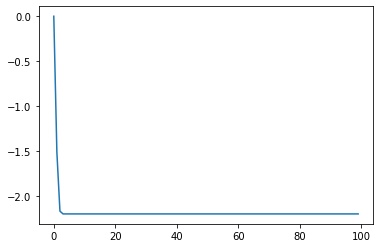

In [26]:
# v = squared errors
v = np.linalg.norm(Biterates - betastar[:, np.newaxis], axis=0)
plt.plot(np.log(v))